In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('lsd_math_score_data.csv')

In [3]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [7]:
time = data[['Time_Delay_in_Minutes']]
LSD = data[['LSD_ppm']]
score = data[['Avg_Math_Test_Score']]

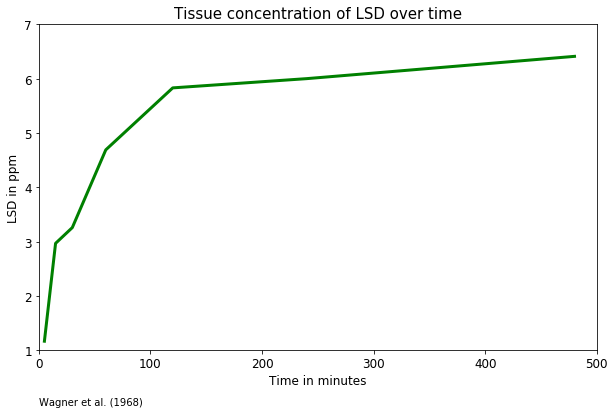

In [5]:
#this line is to save or export this chart with this file (jupyter specific command)
%matplotlib inline  

plt.figure(figsize=(10,6))

plt.title('Tissue concentration of LSD over time', fontsize=15)
plt.xlabel('Time in minutes', fontsize=12)
plt.ylabel('LSD in ppm', fontsize=12)

plt.text(x=0, y=0, s='Wagner et al. (1968)', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0, 500)
plt.ylim(1, 7)

plt.style.use('classic')

plt.plot(time, LSD, color='g', linewidth=3)
plt.show()

In [9]:
regr = LinearRegression()
regr.fit(LSD, score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
regr.coef_ #it return array of array or 2D array

array([[-9.00946642]])

In [13]:
regr.coef_[0][0] #to get the exact value instead of whole array

-9.009466415296785

Here this negative value means that for every ppm of LSD the depreciation of score is 9%

In [15]:
regr.intercept_ #it return array (1-D)

array([89.12387377])

In [16]:
regr.intercept_[0]

89.12387376799308

In [17]:
regr.score(LSD, score) #r-square value

0.8778349707775889

This means that LSD insertion in body affects the maths score by 87%.

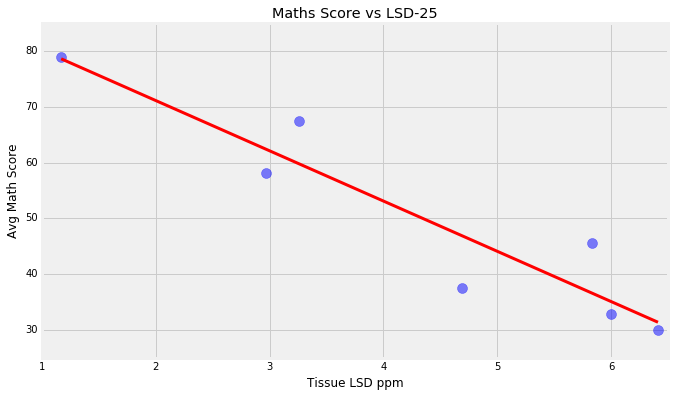

In [35]:
%matplotlib inline

plt.figure(figsize=(10,6))
plt.title('Maths Score vs LSD-25')
plt.xlabel('Tissue LSD ppm')
plt.ylabel('Avg Math Score')
plt.xlim(1, 6.5)
plt.ylim(25,85)
plt.style.use('fivethirtyeight')

plt.scatter(LSD, score, color='blue', alpha=0.5, s=100) #'s' is for the size of data points
predicted_score = regr.predict(LSD)
plt.plot(LSD, predicted_score, color='red', linewidth=3)
plt.show()